# <center>CMSC320 Final Tutorial</center>
# <center>Analysis of Amazon's Top 50 Bestselling Books</center>
## <center>Supriya Maddineni, Lizi Jordan, Irene Hnatiw</center>

# **Introduction**
**Books are an important part of our lives, as reading continues to be a popular leisure activity for many Americans. On average, Americans tend to read [12 to 13 books each year](https://www.bustle.com/p/how-many-books-did-the-average-american-read-in-the-last-year-this-new-study-may-surprise-you-8837851), choosing from millions of options. Given that more than a million books are published each year, it’s interesting to ask which books are we actually choosing to read. With this project, we aim to understand the reading habits of Americans and what types of books constitute the list of Top 50 Bestselling Books, specifically among those bought on Amazon.** 

<img src="https://cdn.elearningindustry.com/wp-content/uploads/2016/05/top-10-books-every-college-student-read-1024x640.jpeg" alt="Italian Trulli">
<br><br>

# **Background about the Dataset**
Whether a book makes it onto a bestselling list is often influenced by the audience, number of sales, and the time that has passed since publication. Additionally, it's worth mentioning that most authors who make it to these lists have prior publications and don't see much success on the first book. It's important to note that some books are boosted to popularity through movie adaptations and celebrity endorsements. If you'd like to read more about the science behind a bestselling books, please check [this](https://blogs.biomedcentral.com/bmcblog/2018/04/06/science-behind-makes-bestselling-book/) out!

To learn more about readers' preferences, we will be using Kaggle's [Amazon's Top 50 Bestselling Dataset](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019), which was created based on the total sales and popularity of the books. The top 50 books from 2009 to 2019 were compiled to create a total of 550 records, and the genre and some additional information was determined through scraping [Goodreads](goodreads.com). The characteristics that the dataset describes are:
* Name: the title of the bestselling book
* Author: the author of the book
* Rating: the average rating that users gave the book on a scale of 1.0 - 5.0
* User Reviews: the number of total reviews that book received
* Price: the price of the bestselling book
* Year: the year that the book was on the bestselling list in years between [2009, 2019]
* Genre: the genre of the book [Fiction, Non-Fiction]
<br>

**Throughout this tutorial, we will attempt to uncover potential trends between the book ratings, genres, year and price.**

# **Python Libraries Used**
Some of the libraries that we will be using are:
* [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
* [Numpy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html)
* [Seaborn](https://seaborn.pydata.org/)
* [Matplotlib](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
* [Scikit-Learn](https://scikit-learn.org/stable/)
* [SciPy](https://docs.scipy.org/doc/scipy/reference/)

If you're not familiar with any of the libraries we're using, please feel free to explore any of the tutorials/documentation linked above.

# **Data Curation and Parsing**

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

We've downloaded our Amazon Top 50 Bestselling Books from 2009-2019 dataset from Kaggle at https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019. Now, let's go ahead and load our data into a Pandas Dataframe. 

A [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html.) is a structured table with rows and columns that allows for quicker access and analysis.

In [73]:
# Let's load the data into our Pandas Dataframe
df = pd.read_csv('bestsellers with categories.csv')
df.head()

,Name,Author,Rating,User Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


We can see from the data output above that we have 550 rows. Since we're looking at a span of 11 years and 50 bestselling books per year, we should be looking at 550 records. Thus, we know that we don't have any extra, duplicate, or missing observations. Now, let's check if we have any missing values in our dataframe:

In [74]:
df.isnull().sum()

Name            0
Author          0
Rating          0
User Reviews    0
Price           0
Year            0
Genre           0
dtype: int64

Now that we know there are no missing values in our data, let's move on to some Exploratory Data Analysis

# **Preliminary Exploratory Data Analysis:**

Let's begin by doing some preliminary data analysis. We can see how average price, average ratings, and average number of user reviews has been changing over the years 2009 - 2019.

In [75]:
# Get the averages of each variable (price, reviews, ratings) for each year in the dataset
avg_data = df.groupby(['Year']).mean()
avg_data = avg_data.reset_index()
avg_data

,Year,Rating,User Reviews,Price
0,2009,4.584,4710.12,15.40
1,2010,4.558,5479.62,13.48
2,2011,4.558,8100.82,15.10
3,2012,4.532,13090.92,15.30
4,2013,4.554,13098.14,14.60
5,2014,4.622,15859.94,14.64
6,2015,4.648,14233.38,10.42
7,2016,4.678,14196.00,13.18
8,2017,4.660,12888.40,11.38
9,2018,4.668,13930.42,10.52


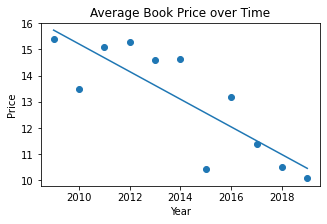

Slope:  -0.5274545454545038


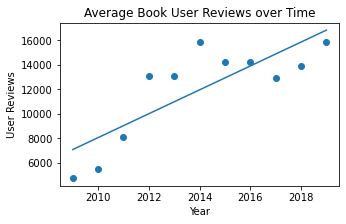

Slope:  976.8403636363427


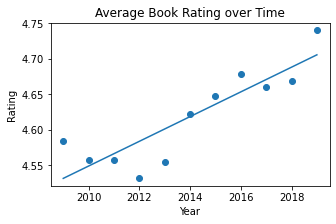

Slope:  0.01738181818181717


In [76]:
# List the variables that we are trying to explore relative to Time
plot_vars = ['Price', 'User Reviews', 'Rating']

for var in plot_vars:
    x_vals = avg_data['Year']
    y_vals = avg_data[var]
    
    # Add the best-fit regression line
    m, b = np.polyfit(x_vals, y_vals, 1)
    plt.figure(figsize = (5,3))
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals, m * x_vals + b)

    # Format the graph with titles and axes titles
    plt.title('Average Book ' + var + ' over Time')
    plt.xlabel("Year")
    plt.ylabel(var)
    plt.show()
    
    # Print the slope for each graph
    print("Slope: ", m)

Looking at these graphs, we can see that the average bestselling book price has been decreasing over time. Specifically, the price seems to be decreasing at a rate of $0.50 per year, which is a significant decrease. On the other hand, the average number of users reviews appears to be generally increasing over time at a rate of 976 new reviews each year. **To put this into perspective, it could be that lowered prices have made these books more accessible. Due to higher accessibility and thus, higher number of readers, we could be seeing a higher number of user reviews.** In a world dominated by technology, it might surprising to see that the popularity of reading is on the rise.
<br><br>
The average book rating seems to be fluctuating quite a bit, but generally increased over time. Given that the rating range is quite small (1.0 - 5.0), the 0.017 increase is quite significant. **This could be that the books and writing styles are actually getting better over time or readers are enjoying books more in 2019 than in 2009.**
<br> <br>



## **Advanced Exploratory Data Analysis: Variable Correlation and Differences among Fiction vs. NonFiction Books**


First, we will analyze the ratio of fiction to nonfiction books within this list in total (from 2009 to 2019) to see which genre appears more often out of the two in aggregate over the ten years. **Looking at the graph below, it's clear that readers tend to prefer non-fiction over fiction books.**

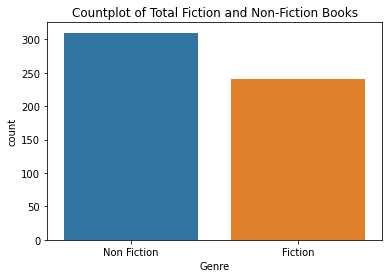

In [77]:
sns.countplot(x='Genre',data = df) \
.set_title('Countplot of Total Fiction and Non-Fiction Books')
plt.show()

We know that some of the characteristics of the bestselling books given are price, rating, and number of reviews. Given these variables, we would like to find out if there is any relationship between price and the other two variables among the two genres. Let's try to visualize these relationships through [correlation heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to see if we see any trends.

In [78]:
# Separate the data by the genres
fiction_data = df[df['Genre'] == 'Fiction']
non_fiction_data = df[df['Genre'] == 'Non Fiction']

# Print the first few entries to make sure everything looks correct
non_fiction_data.head(5)

,Name,Author,Rating,User Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction


In [79]:
# Print the first few entries to make sure everything looks correct
fiction_data.head(5)

,Name,Author,Rating,User Reviews,Price,Year,Genre
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction


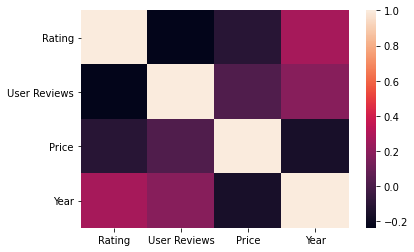

In [80]:
# Get the correlation matrix for characteristics of fiction books
fiction_corr = fiction_data.corr()

# Visualize the matrix through a correlation heatmap
sns.heatmap(fiction_corr)
plt.show()

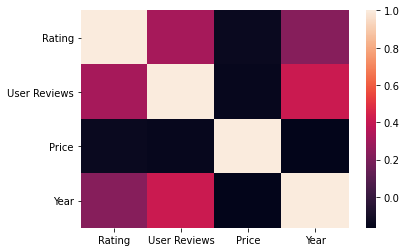

In [81]:
# Get the correlation matrix for characteristic of nonfiction books
non_fiction_corr = non_fiction_data.corr()

# Visualize the matrix through a correlation heatmap
sns.heatmap(non_fiction_corr)
plt.show()

**Considering the heatmaps for the two genres, we don't see any reasonable correlations (all seem to be <= 0.5) between any two characteristics.** Looking at the first heatmap, we see that rating and year are most closely related in fiction books. On the other hand, the second heatmap suggests that user reviews and year have the most correlation in the nonfiction genre.

Next, we will analyze how the ratio of nonfiction to fiction books on the list has changed over time, by creating a countplot for fiction vs nonfiction for each year (2009 to 2019) to see if there is a pattern of which genre is more popular over time.

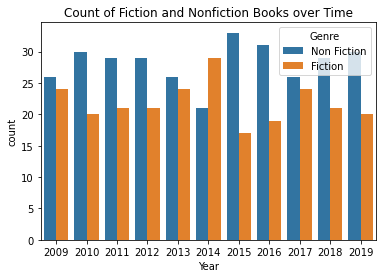

In [82]:
sns.countplot(x='Year',hue='Genre',data=df) \
  .set_title('Count of Fiction and Nonfiction Books over Time')
  
plt.show()

Next, let's take a look at the average ratings for fiction vs non-fiction books over time. **We have already learned that overall there are more non-fiction than fiction books.** From the above bar graph, every year shows that there are more non-fiction books (except for 2014). Now we will look at how the average ratings for each genre change over time. 

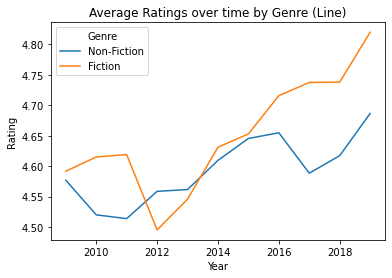

In [83]:
# List of years
years =  np.unique(df['Year'])
# empty dataframe that will store the mean data for each year for fiction and nonfiction
mean = pd.DataFrame([], columns=['Year','Rating','Genre'])

for year in years:   
    # Creates temp dataframes that store all the entries of the specified genre and year
    fiction_df = df.loc[df['Genre'] == 'Fiction'].loc[df['Year'] == year]
    nonfiction_df = df.loc[df['Genre'] == 'Non Fiction'].loc[df['Year'] == year]

    # Calculates the average rating for the specified year and genre
    fiction_rating = fiction_df['Rating'].mean()
    nonfiction_rating = nonfiction_df['Rating'].mean()

    # Adds the average rating for each genre to mean, for the current year
    mean = mean.append({'Year':year, 'Rating':nonfiction_rating, \
                        'Genre':'Non-Fiction'}, ignore_index = True)
    mean = mean.append({'Year':year,'Rating':fiction_rating, \
                        'Genre':'Fiction'}, ignore_index = True)

sns.lineplot(x='Year', y='Rating', hue='Genre', data=mean)
plt.title('Average Ratings over time by Genre (Line)')
plt.show()

Earlier, we saw there was an overall increase in ratings of the top 50 books. According to this, the average ratings for both genres are increasing for the most part, which follows along with what we discovered earlier. **Additionally, it seems that fiction books seem to have higher ratings than non-fiction books, which is interesting. You would think that since non-fiction books are more popular among the top 50, that they might have higher ratings due to the popularity, but that is not the case here.**


# **Bestselling Authors Analysis**

Let's take a look at the top 10 most best selling authors from 2009-2019

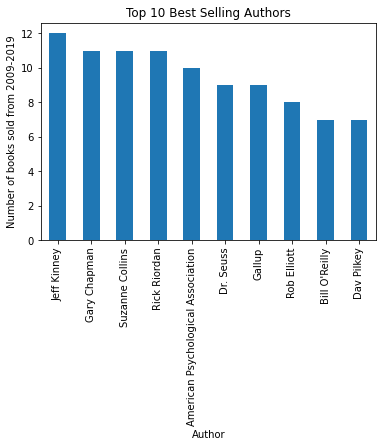

In [84]:
top_authors = df['Author'].value_counts(sort=True)
top_authors = top_authors.head(10)
top_authors.plot(kind='bar', title='Top 10 Best Selling Authors')
plt.ylabel("Number of books sold from 2009-2019")
plt.xlabel("Author")
plt.show()

In [85]:
# Top 10 authors information
a1 = df.loc[df['Author'] == 'Jeff Kinney']
a2 = df.loc[df['Author'] == 'Suzanne Collins']
a3 = df.loc[df['Author'] == 'Gary Chapman']
a4 = df.loc[df['Author'] == 'Rick Riordan']
a5 = df.loc[df['Author'] == 'American Psychological Association']
a6 = df.loc[df['Author'] == 'Dr. Seuss']
a7 = df.loc[df['Author'] == 'Gallup']
a8 = df.loc[df['Author'] == 'Rob Elliott']
a9 = df.loc[df['Author'] == 'Stephen R. Covey']
a10 = df.loc[df['Author'] == 'Eric Carle']

print('Example of Popular Series')
print(a1[['Name','Author']])
print('\nExample of Single Popular Book')
print(a3[['Name','Author']])

Example of Popular Series
                                                  Name       Author
42          Cabin Fever (Diary of a Wimpy Kid, Book 6)  Jeff Kinney
71             Diary of a Wimpy Kid: Hard Luck, Book 8  Jeff Kinney
72       Diary of a Wimpy Kid: The Last Straw (Book 3)  Jeff Kinney
73                 Diary of a Wimpy Kid: The Long Haul  Jeff Kinney
80   Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...  Jeff Kinney
88              Double Down (Diary of a Wimpy Kid #11)  Jeff Kinney
253              Old School (Diary of a Wimpy Kid #10)  Jeff Kinney
381                                        The Getaway  Jeff Kinney
435        The Meltdown (Diary of a Wimpy Kid Book 13)  Jeff Kinney
468     The Third Wheel (Diary of a Wimpy Kid, Book 7)  Jeff Kinney
474      The Ugly Truth (Diary of a Wimpy Kid, Book 5)  Jeff Kinney
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  Jeff Kinney

Example of Single Popular Book
                                                  Name    

After taking a look at the top 10 best selling authors, we can immediately see some reasoning behind their popularity. After taking a look at the entries, most of the authors fall into two cases. 
**The first one includes authors that wrote an extremely famous book that never lost popularity. Therefore the author has one book that has been in the top-50 for multiple years.** The authors that fall into this include Eric Carle (The very hungry Caterpillar), Gary Chapman (The 5 Love Languages), The American Psychology Association, Dr. Seuss (Oh, the Places You'll Go!), Gallup, Rob Elliott, who had two famous books that made it in the top 50 multiple times, and Stephen Covey. 

**The other case is where authors write a popular series. In this case there tends to be a different book each year.** Additionally, the books are sold in sets and sometimes those sets are also in the top 50. Some authors that fall into this case include Suzanne Collins, Jeff Kinney, and Rick Riordan. 

One other interesting observation from this is that all of the authors stuck to one genre. **In other words, there was no author who had different books that were different genres.**

Printed above are examples of each case mentioned. Jeff Kinney is printed first to demonstrate when authors write popular series. After that, Gary Chapman demonstrates when one book is in the top charts for multiple years. 

# **Comparing Rating of Books to Number of Reviews**

It is possible that the higher the rating of a book is, the more reviews it has (or vice versa) because better books may have more readers and hence more reviews. Let's see if there is a connection between the number of reviews and the ratings of the books.

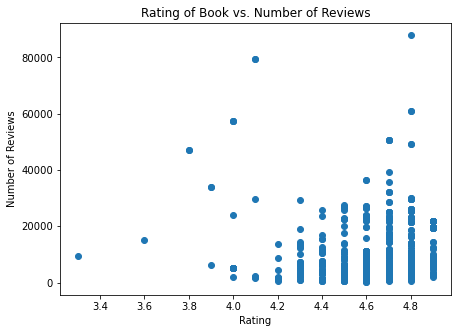

In [86]:
# List our x and y variables
y_vals = df['User Reviews']
x_vals = df['Rating']
    
# Plot the points on scatterplot
plt.figure(figsize = (7,5))
plt.scatter(x_vals, y_vals)

# Format the graph with titles and axes titles
plt.title('Rating of Book vs. Number of Reviews')
plt.xlabel("Rating")
plt.ylabel('Number of Reviews')
plt.show()

Based on this scatter plot, there does seem to be a general trend. **As expected it seems that the books with higher ratings tend to have more books with a higher number of reviews. On the other hand, it seems that regardless of the rating, even though higher ratings have books with more reviews than others, they still have a ton of books with fewer reviews as well.** Additionally, there seem to be quite a few outliers in the graph, which may lead people to believe that this trend is not very strong.

# **Hypothesis Testing**

Now we will conduct [hypothesis testing](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/), we want to know how the number of reviews trends over time. Our null hypothesis is that the total number of reviews has stayed the same over the past 10 years.  To test this hypothesis, we will use an independent t-test to compare the mean number of reviews over the first 5 years (2009-2013), compared to the mean number of reviews over the last five years (2014-2019), and see if there is a significant statistical difference. 

In [87]:
# Define the range of years on the bestselling books data
reviews = {2009:0,2010:0,2011:0,2012:0,2013:0,
           2014:0,2015:0,2016:0,2017:0,2018:0,2019:0}


for index,row in df.iterrows():
    for key in reviews:
        if row['Year'] == key:
            reviews[key] = reviews[key] + row['User Reviews']

a = []
b = []

# Separate the review data by year
for key in reviews:
    if key <= 2013:
        a.append(reviews[key])
    else:
        b.append(reviews[key])
    
# Perform the T-test and output results
result = stats.ttest_ind(a,b)   
result 

Ttest_indResult(statistic=-3.273368672572762, pvalue=0.009630742349505367)

If we evaluate this at a 5% significance level, we can reject the null hypothesis given the T-value of -3.27 and because p-value (0.0096) is less than 0.05. This means that the mean number of reviews over the first five years, is much smaller than the mean number of reviews in the latter 6 years. **This implies possibly that more people started buying books off of Amazon, or that more people simply became comfortable with the platform and leaving reviews. This observation could also imply that more people are reading books over time.**

The increase in number of reviews is also supported by the Number of Reviews vs. Year graph from the Preliminary Exploratory Data Analysis section.

Let's try another hypothesis test to see if the mean price of fiction books is equal to the mean price of non-fiction books

In [88]:
# Separate the data into two separate samples (nonfiction vs fiction)
fiction_data = df[df['Genre'] == 'Fiction']
fiction_data_prices = fiction_data['Price']

non_fiction_data = df[df['Genre'] == 'Non Fiction']
nonfiction_data_prices = non_fiction_data['Price']

result = stats.ttest_ind(nonfiction_data_prices, fiction_data_prices)
result

Ttest_indResult(statistic=4.351608076818746, pvalue=1.612435071812073e-05)

If we evaluate this at a 5% significance level, we cannot reject the null hypothesis given the T-value of 4.35 and because p-value (1.612) is greater than 0.05. This means that the mean price of fiction books is equal to the mean price of nonfiction books. **This suggests that there isn't really a difference in pricing between the genres. Thus, there isn't really a greater profit for authors by writing in a certain genre.**

# **Predicting the Genre of Bestselling Books**

Next we will take a look at if we can possibly identify if a book is fiction or non-fiction based on its price, rating, year, etc. by using a classifier. We used multiple different classifiers to try to predict the genre. All classifier have different strengths, so this will tell us which classifiers are able to predict genre better. 

You can find more information and learn more about the classifiers we are using [here](https://scikit-learn.org/stable/supervised_learning.html)

In [89]:
df_copy = df.copy()

In [90]:
def set_x():
    X = df_copy.drop(columns=['Name','Author','Genre']) # Data we are using to guess genre, we are not using author or genre
    text = df_copy.Name.apply(lambda x: re.sub('[^A-z\s]','',x).lower()) 
    
    # Convert titles to a matrix of TF-IDF features.
    converter = TfidfVectorizer(max_features=2000,max_df=0.6,min_df=1)
    coded = converter.fit_transform(text).toarray()
    
    s = StandardScaler()
    x = np.concatenate((coded,X),axis=1)
    x = s.fit_transform(x)
    
    return x

def set_y():
    y = df_copy.Genre # Data we are guessing
    genre_to_binary = preprocessing.LabelEncoder() 
    y = genre_to_binary.fit_transform(y)
    
    return y

In [91]:
x = set_x()
y = set_y()

**While trying to predict genre, it was determined that the name of the book had a bigger impact on the success of guessing genre than we thought, but it is a little difficult to store the data of a title and run tests on it.** 

To implement the title of the books, we stripped the strings of any non-letter characters, and used a TfidVectorizer to convert it to a numeric value. After this, we added the name field back to the dataset we were testing.

In [92]:
# Splits data up into test and train sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [93]:
# SVC Classifier
svc_clf = SVC(C=1.0,gamma='auto')

# Logistic Regression Classifier
lr_clf = LogisticRegression()

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

# Gaussian NV Classifier
gnb_clf = GaussianNB()

# K-Nearest Neighbors Classifier
knn_clf = KNeighborsClassifier(n_neighbors=20)

# Non-linear SVC Classifier
nlsvm_clf = svm.NuSVC(gamma='auto')

# Linear Discriminant Analysis Classifier
lda_clf = LinearDiscriminantAnalysis()

In [94]:
classifiers = [svc_clf, knn_clf, lr_clf, dt_clf, gnb_clf, nlsvm_clf, lda_clf] 
classifier_names = ['SVC', 'K-Nearest Neighbors', 'Logistic Regression', 
                    'Decision Tree', 'Guassian NB', 'Non-Linear SVM', 
                    'Linear Discriminant Analysis'] 

classifier_results = pd.DataFrame([],columns=['Classifier','Accuracy','F1 Score','CV_Accuracy'])

In [95]:
for index, classifier in enumerate(classifiers):
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    f1_accuracy = f1_score(y_test,y_pred)
    cv_accuracy = cross_val_score(classifier, x_train, y_train, scoring='accuracy', cv=10)
    classifier_results.loc[index] = [classifier_names[index],accuracy, f1_accuracy, cv_accuracy.mean()]
    
classifier_results = classifier_results.sort_values(by = ['Accuracy'],ascending=False)
classifier_results

,Classifier,Accuracy,F1 Score,CV_Accuracy
0,SVC,0.927273,0.944444,0.854545
5,Non-Linear SVM,0.927273,0.944444,0.879545
2,Logistic Regression,0.918182,0.934307,0.918182
4,Guassian NB,0.909091,0.929577,0.886364
3,Decision Tree,0.900000,0.923077,0.879545
6,Linear Discriminant Analysis,0.790909,0.818898,0.743182
1,K-Nearest Neighbors,0.490909,0.363636,0.581818


**Based on all of the classifiers, it seems that the Logistic Regression Classifier is the most accurate.** It had an accuracy score of 95%, an F1 score of .95, and CV_Accuracy of .915. This was the highest of all of the classifiers. On the other hand, the LDA algorithm was the least effective with accuracy, f1, and cv scores of .73, .756, and .736, respectively. 

# **Predicting Price of Bestselling Books**

Now that we've seen it's possible to predict Genre from the information given, let's see if it's possible to predict the Price given Genre, User Reviews, and Rating. In the previous prediction section we could use classifiers and logistic regression since we only had two groups (fiction vs nonfiction). Since Price isn't a categorical variable here, we can use Linear Regression to see if Price can be predicted. 

You can find out more about Scikit-Learn's Linear Regression model [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [96]:
# Instantiate our linear regression model
reg = LinearRegression()

In [97]:
data = df.copy()
# Iterate through the dataframe and change genre to a binary variable
for i, row in df.iterrows():
    if df.at[i,'Genre'] == 'Non Fiction':
        binary_genre = 0
    elif df.at[i,'Genre'] == 'Fiction':
        binary_genre = 1
    data.at[i, 'Genre'] = binary_genre

In [98]:
# Separate our data into predictor variables and the data to be predicted
x = data[['Rating', 'User Reviews', 'Year', 'Genre']]
y = data[['Price']]

In [99]:
# Separate each group into training and testing data sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.1)

In [100]:
# Fit the Regression Model and check the score to see performance
reg.fit(x_train, y_train)
accuracy_score = reg.score(x_test, y_test)
accuracy_score

0.02516247482631584

As we can see, the linear regression model score is quite low at anywhere from -2% to ~3% accuracy. This suggests that **we cannot use Genre, User Reviews, and Rating to predict the Price of a bestselling book.** Sometimes the accuracy score is negative, and this is ok! Although the R^2 is bounded by 1.0, it does not have a lower bound. The negative score just tells us that the model can sometimes be much worse than random guessing. Furthermore, this low R^2 score makes sense since we saw earlier that price does not have a strong correlation with any of the other variables.
<br><br>
**In context, price may be difficult to predict, as it is up to the discretion of the author and the publishing company. Since a standard price is often set before a book is released, it makes sense that there's no reliance or correlation with the number of user reviews and ratings.**

# **Conclusion**
**After analyzing the top 50 rated books on Amazon from 2009 to 2019, we have come away with several meaningful conclusions. We found that nonfiction books have consistently outrated fiction books  over the last ten years. Furthermore, we found that the number of reviews from year to year has been steadily increasing, which most likely indicates an increased familiarity with Amazon for buying and reviewing books. By using classifiers, we were able to observe that the price of a top rated book could not be predicted clearly, since the user ratings don't set the price of a book generally.** 

**These analyses can be very meaningful when looked at in the right context. For publishing houses, this information can be extremely helpful for making decisions on what types of books to publish in terms of what would financially be most successful. The demonstrated increased in using Amazon to buy and review books is an indicator that Amazon is a great marketplace on which to sell books.**